<a href="https://colab.research.google.com/github/adithi20/-CSE_Projects/blob/main/Unveiling_Game_Sales_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload the Excel file
uploaded = files.upload()


Saving Video_Games_Sales_as_at_22_Dec_2016.csv to Video_Games_Sales_as_at_22_Dec_2016.csv


                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

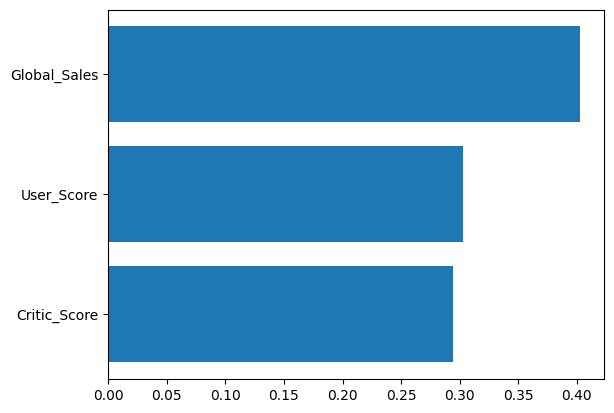

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Step 2: Load and Explore Data
# Assuming the file name is 'Video_Games_Sales_as_at_22_Dec_2016.csv'
data = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

# Explore the data
print(data.head())
print(data.info())

# Step 3: Data Preprocessing (Handle missing values, encode categorical variables, etc.)
# For simplicity, let's drop rows with missing values
data = data.dropna()

# Step 4: Feature Selection
# Adjust features and target variable based on your dataset
features = data[['Critic_Score', 'User_Score', 'Global_Sales']]
target = data['Genre']

# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Step 6: Train the Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 7: Make Predictions
predictions = model.predict(X_test)

# Step 8: Evaluate the Model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

# Step 9: Visualize Results (Optional)
# Feature importance plot
plt.barh(features.columns, model.feature_importances_)
plt.show()


In [3]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cross_val_scores = cross_val_score(model, features, target, cv=5)  # Use 5-fold cross-validation (adjust as needed)

# Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", cross_val_scores.mean())


Cross-Validation Scores: [0.08864469 0.10915751 0.08205128 0.03663004 0.04981685]
Mean Cross-Validation Score: 0.07326007326007325


In [4]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(data, x='Critic_Score', y='User_Score', color='Genre', title='Interactive Scatter Plot')
fig.update_layout(title_text='Interactive Scatter Plot', title_x=0.5)

# Show the plot
fig.show()
